Predicted weights are:  [0.33333324231911526, 0.33333324231911526]


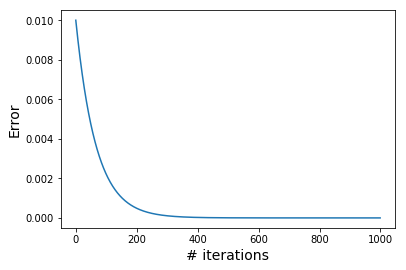

In [210]:
import numpy as np
from operator import add
import matplotlib.pyplot as plt

#---------------------- Initialization --------------------------
# Initializing random input from (-0.5, 0.5)
X = [[0, 0], [0, 1], [1, 0], [1, 1]]
output = [0, 1, 1, 0]
num_iterations = 1000
mu = 0.01
# Initializing random weights between (0, 1)
predicted_weights = [0, 0]
errors = []

#---------------------- LMS Algorithm ---------------------------
for index in range(0, num_iterations):
    weights = []
    for j in range(index, index + 4):
        x = X[j % len(output)]
        actual_output = output[j % len(output)]
        predicted_output = sum(i[0] * i[1] for i in zip(x, predicted_weights))

        d = np.sum(actual_output)
        e = np.sum(predicted_output)        

        x = [2.0 * i * mu * (d - e) for i in x]
        
        weights.append(x)
    errors.append(np.sum(np.array(weights).mean(axis=0)))
    predicted_weights = list(map(add, predicted_weights, np.array(weights).mean(axis=0)))    

plt.plot(errors)
plt.xlabel('# iterations', fontsize=14, color='black')
plt.ylabel('Error', fontsize=14, color='black')

print("Predicted weights are: ", predicted_weights)

[[129891.      0.]
 [     0. 129891.]]
Predicted weights are:  [[0.49951751]
 [0.49951671]]


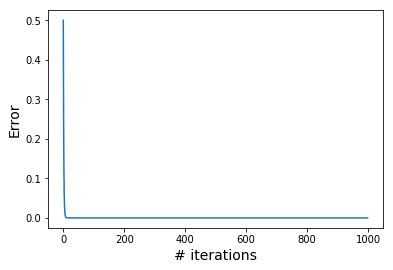

In [209]:
import numpy as np
from operator import sub
import matplotlib.pyplot as plt

#---------------------- Initialization --------------------------
# Initializing random input from (-0.5, 0.5)
X = [[0, 0], [0, 1], [1, 0], [1, 1]]
output = [0, 1, 1, 0]
num_iterations = 1000
# Initializing random weights between (0, 1)
predicted_weights = np.matrix([0, 0])
predicted_weights = predicted_weights.transpose()
errors = []
eta = 129891
R_k_inverse = eta * np.identity(len(X[0]))

print(R_k_inverse)

#---------------------- RLS Algorithm ---------------------------
for index in range(0, num_iterations):
    weights = []
    for j in range(index, index + 4):
        x = np.matrix(X[(j) % len(output)])
        x = x.transpose()
        actual_output = output[(j) % len(output)]
        predicted_output = predicted_weights.transpose() * x

        error = actual_output - predicted_output    

        Z_k = R_k_inverse * x

        q = x.transpose() * Z_k

        v = 1 / (1 + q)

        Z_k_cap = np.multiply(v,  Z_k)
        
        weights.append(np.multiply(error, Z_k_cap))
            
        R_k_inverse = R_k_inverse - Z_k_cap * Z_k_cap.transpose() 
    errors.append(np.sum(np.array(weights).mean(axis=0)))
    predicted_weights = predicted_weights + np.array(weights).mean(axis=0)

plt.plot(errors)
plt.xlabel('# iterations', fontsize=14, color='black')
plt.ylabel('Error', fontsize=14, color='black')

print("Predicted weights are: ", predicted_weights)